<a href="https://colab.research.google.com/github/renataferreirasf/metodos-numericos/blob/main/Renata_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: Renata da Silva Ferreira__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>


Uma das técnicas mais utilizadas na redução de dimensionalidade é um método estatístico designado por Principal Component Analysis (PCA). A Análise de componentes principais – ACP ou PCA (do inglês Principal
component analysis) foi primeiro introduzido por Pearson em 1901 e
desenvolvida de forma independentemente por Hotelling em 1933.

O PCA é caracterizado por identificar as dimensões ao longo das quais os dados se encontram mais dispersos. Desta forma, consegue-se identificar as dimensões que melhor diferenciam o conjunto de dados em análise, ou seja, os seus componentes principais. O objetivo do PCA é explicar a estrutura de covariância dos dados através de variáveis auxiliares chamadas de componentes. Essas componentes são construídas através de combinações lineares das variáveis originais e são não-correlacionadas. Sucintamente, o PCA consiste em calcular os autovalores e os autovetores da matriz de covariância ou de correlação.

A análise de componentes principais é um método importante no processamento de sinais e estatísticas para descobrir a estrutura latente de baixa classificação em conjuntos de dados de alta dimensão. Por sua vez, a estrutura de baixa classificação é um modelo importante em visão computacional porque a alta correlação temporal do vídeo naturalmente admite uma representação de baixa classificação. Embora o PCA seja estável na presença de ruído relativamente pequeno, sabe-se que mesmo alguns grandes valores discrepantes nos dados podem fazer com que o PCA se desfaça completamente.

Para mitigar a quebra de PCA, algoritmos robustos de PCA foram propostos recentemente que buscam decompor um matriz em um componente de LowRank e um componente esparso.


<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Um problema importante em visão computacional: a separação foreground-background, em português, do primeiro e segundo plano. Em particular, estamos interessados ​​na separação robusta de foreground-background, onde se decompõe uma cena em um componente de fundo estático e um componente de primeiro plano dinâmico na presença de corrupções. 

Tais decomposições são valiosas em aplicações de visão porque os componentes contêm informações úteis para processamento subsequente. Por exemplo, o componente de primeiro plano é útil para detecção de movimento, reconhecimento de objeto, detecção de objeto em movimento, e codificação de vídeo. O componente de fundo também pode ser útil em aplicações como subtração de fundo, onde se estima um modelo de fundo de uma cena e então discrimina objetos em movimento subtraindo o modelo de novos quadros.


<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

Bibliotecas necessárias:
> import  moviepy.editor  as  mpe 
> from  glob  import  glob

> import  sys ,  os 
> import  numpy  as  np 
> import  scipy

> % matplotlib importa  em linha
> matplotlib.pyplot  como  plt

In [3]:
def create_data_matrix_from_video(clip, k=5, scale=50):
    return np.vstack([np.array(Image.fromarray(rgb2gray(clip.get_frame(i/float(k))).astype(np.uint8)).resize(scale)).flatten() 
                      for i in range(k * int(clip.duration))]).T

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [5]:
def plt_images(M, A, E, index_array, dims, filename=None):
    f = plt.figure(figsize=(15, 10))
    r = len(index_array)
    pics = r * 3
    for k, i in enumerate(index_array):
        for j, mat in enumerate([M, A, E]):
            sp = f.add_subplot(r, 3, 3*k + j + 1)
            sp.axis('Off')
            pixels = mat[:,i]
            if isinstance(pixels, scipy.sparse.csr_matrix):
                pixels = pixels.todense()
            plt.imshow(np.reshape(pixels, dims), cmap='gray')
    return f

In [6]:
def plots(ims, dims, figsize=(15,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        plt.imshow(np.reshape(ims[i], dims), cmap="gray")

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [7]:
pip install moviepy

In [8]:
pip install scikit-image

In [9]:
pip install opencv-python

In [10]:
import moviepy.editor as mpe
# from IPython.display import display
from glob import glob

import sys, os
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3317760/45929032 bytes (7.2%)6561792/45929032 bytes (14.3%)9486336/45929032 bytes (20.7%)12525568/45929032 bytes (27.3%)15876096/45929032 bytes (34.6%)18980864/45929032 bytes (41.3%)22052864/45929032 bytes (48.0%)25477120/45929032 bytes (55.5%)28909568/45929032 bytes (62.9%)32366592/45929032 bytes (70.5%)35995648/45929032 bytes (78.4%)39493632/45929032 bytes (86.0%)

In [11]:
# MAX_ITERS = 10
TOL = 1.0e-8

In [12]:
import cv2

In [13]:
pip install Pillow

In [14]:
pip install fbpca

  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11375 sha256=81898f1a0e67d7523579009cd6a7484a1ab370316383bd2f3e81cc8ef484ec60
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
Successfully built fbpca


In [15]:
from PIL import Image

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
video = mpe.VideoFileClip("/content/drive/MyDrive/projetovideo.mp4")

In [18]:
video.subclip(0,50).ipython_display(width=300)

100%|█████████▉| 350/351 [00:00<00:00, 911.24it/s]


In [19]:
video.duration

50.0

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

In [20]:
scale = 25   # Adjust scale to change resolution of image
dims = (int(240 * (scale/100)), int(320 * ((scale)/100)))

In [21]:
M = create_data_matrix_from_video(video, 226, (80,60))
# M = np.load("high_res_surveillance_matrix.npy")

In [22]:
print(dims, M.shape)

(60, 80) (4800, 11300)


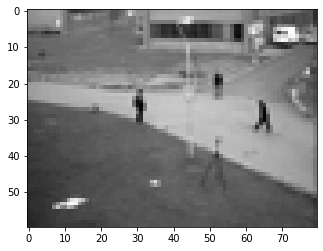

In [23]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray');plt.imshow(np.reshape(M[:,140], dims), cmap='gray');

In [24]:

np.save("low_res_surveillance_matrix.npy", M)

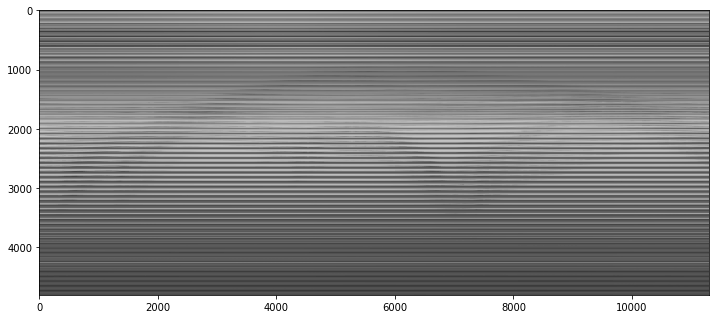

In [25]:
plt.figure(figsize=(12, 12))
plt.imshow(M, cmap='gray')

> **SDV**

In [26]:
pip install -U scikit-learn

In [27]:
from sklearn import decomposition

In [28]:
u, s, v = decomposition.randomized_svd(M, 2)

In [29]:
u.shape, s.shape, v.shape

((4800, 2), (2,), (2, 11300))

In [30]:
low_rank = u @ np.diag(s) @ v

In [31]:
low_rank.shape

(4800, 11300)

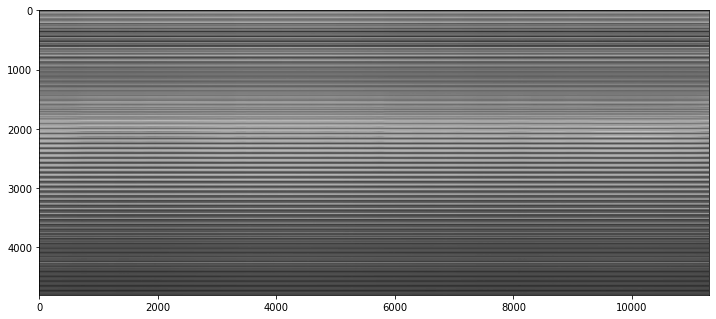

In [32]:
plt.figure(figsize=(12, 12))
plt.imshow(low_rank, cmap='gray')

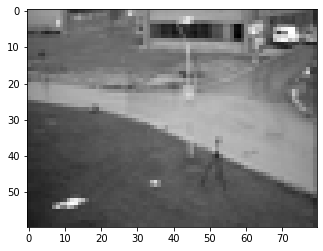

In [33]:
plt.imshow(np.reshape(low_rank[:,140], dims), cmap='gray');

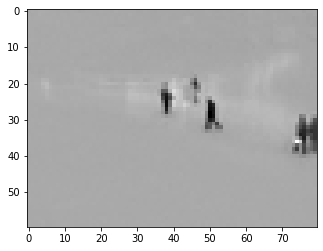

In [34]:
plt.imshow(np.reshape(M[:,550] - low_rank[:,550], dims), cmap='gray');

In [35]:
pip install fbpca

In [36]:
from scipy import sparse
from sklearn.utils.extmath import randomized_svd
import fbpca

In [37]:
TOL=1e-9
MAX_ITERS=3

In [38]:
def converged(Z, d_norm):
    err = np.linalg.norm(Z, 'fro') / d_norm
    print('error: ', err)
    return err < TOL

In [39]:
def shrink(M, tau):
    S = np.abs(M) - tau
    return np.sign(M) * np.where(S>0, S, 0)

In [40]:
def _svd(M, rank): return fbpca.pca(M, k=min(rank, np.min(M.shape)), raw=True)


In [41]:
def norm_op(M): return _svd(M, 1)[1][0]

In [42]:
def svd_reconstruct(M, rank, min_sv):
    u, s, v = _svd(M, rank)
    s -= min_sv
    nnz = (s > 0).sum()
    return u[:,:nnz] @ np.diag(s[:nnz]) @ v[:nnz], nnz

In [43]:
def pcp(X, maxiter=10, k=10): # refactored
    m, n = X.shape
    trans = m<n
    if trans: X = X.T; m, n = X.shape
        
    lamda = 1/np.sqrt(m)
    op_norm = norm_op(X)
    Y = np.copy(X) / max(op_norm, np.linalg.norm( X, np.inf) / lamda)
    mu = k*1.25/op_norm; mu_bar = mu * 1e7; rho = k * 1.5
    
    d_norm = np.linalg.norm(X, 'fro')
    L = np.zeros_like(X); sv = 1
    
    examples = []
    
    for i in range(maxiter):
        print("rank sv:", sv)
        X2 = X + Y/mu
        
        # update estimate of Sparse Matrix by "shrinking/truncating": original - low-rank
        S = shrink(X2 - L, lamda/mu)
        
        # update estimate of Low-rank Matrix by doing truncated SVD of rank sv & reconstructing.
        # count of singular values > 1/mu is returned as svp
        L, svp = svd_reconstruct(X2 - S, sv, 1/mu)
        
        # If svp < sv, you are already calculating enough singular values.
        # If not, add 20% (in this case 240) to sv
        sv = svp + (1 if svp < sv else round(0.05*n))
        
        # residual
        Z = X - L - S
        Y += mu*Z; mu *= rho
        
        examples.extend([S[140,:], L[140,:]])
        
        if m > mu_bar: m = mu_bar
        if converged(Z, d_norm): break
    
    if trans: L=L.T; S=S.T
    return L, S, examples

In [44]:
m, n = M.shape
round(m * .05)

240

In [45]:
L, S, examples =  pcp(M, maxiter=5, k=10)

rank sv: 1
error:  0.13221606775947453
rank sv: 241
error:  0.04033444137788561
rank sv: 43
error:  0.004869501371736703
rank sv: 283
error:  0.00040426288077445593
rank sv: 523
error:  1.0440066702272745e-05


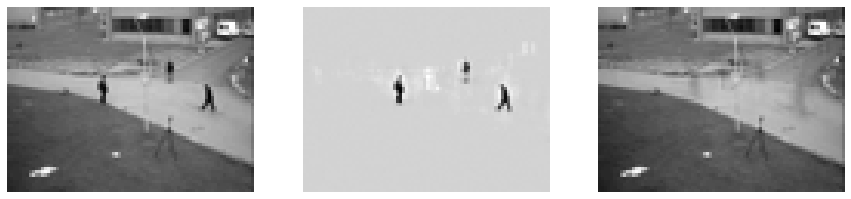

In [46]:
f = plt_images(M, S, L, [140], dims)

In [47]:
np.save("high_res_L.npy", L)
np.save("high_res_S.npy", S)


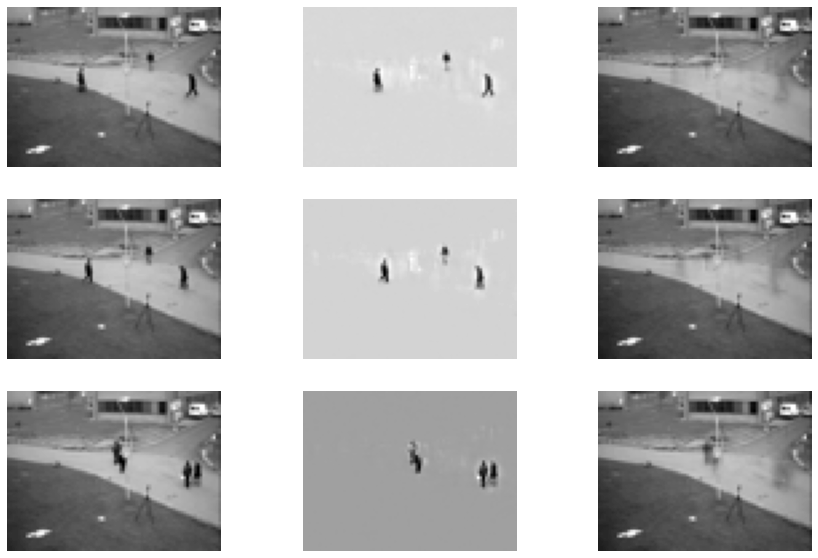

In [48]:
f = plt_images(M, S, L, [0, 100, 1000], dims)